In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget --no-check-certificate \
    https://github.com/gezza/pipe-condition-classifier/blob/main/data/pipes-augmented.zip?raw=true \
    -O /tmp/pipes-augmented.zip

--2021-04-25 10:47:30--  https://github.com/gezza/pipe-condition-classifier/blob/main/data/pipes-augmented.zip?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/gezza/pipe-condition-classifier/raw/main/data/pipes-augmented.zip [following]
--2021-04-25 10:47:30--  https://github.com/gezza/pipe-condition-classifier/raw/main/data/pipes-augmented.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gezza/pipe-condition-classifier/main/data/pipes-augmented.zip [following]
--2021-04-25 10:47:31--  https://raw.githubusercontent.com/gezza/pipe-condition-classifier/main/data/pipes-augmented.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent

In [3]:
import zipfile

local_zip = '/tmp/pipes-augmented.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/pipes_data')

zip_ref.close()

In [4]:
print(len(os.listdir('/tmp/pipes_data/good/')))
print(len(os.listdir('/tmp/pipes_data/bad/')))

500
500


In [5]:
file_path = '/tmp/pipes'
source_path = '/tmp/pipes_data'

In [6]:
try:
    os.mkdir('{}'.format(file_path))
    os.mkdir('{}/train'.format(file_path))
    os.mkdir('{}/test'.format(file_path))
    os.mkdir('{}/train/good'.format(file_path))
    os.mkdir('{}/train/bad'.format(file_path))
    os.mkdir('{}/test/good'.format(file_path))
    os.mkdir('{}/test/bad'.format(file_path))
except OSError:
    pass

In [7]:
import random
from shutil import copyfile
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[:testing_length]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


GOOD_SOURCE_DIR = '{}/good/'.format(source_path)
TRAIN_GOOD_DIR = '{}/train/good/'.format(file_path)
TEST_GOOD_DIR = '{}/test/good/'.format(file_path)
BAD_SOURCE_DIR = '{}/bad/'.format(source_path)
TRAIN_BAD_DIR = '{}/train/bad/'.format(file_path)
TEST_BAD_DIR = '{}/test/bad/'.format(file_path)

split_size = .8
split_data(GOOD_SOURCE_DIR, TRAIN_GOOD_DIR, TEST_GOOD_DIR, split_size)
split_data(BAD_SOURCE_DIR, TRAIN_BAD_DIR, TEST_BAD_DIR, split_size)

In [8]:
num_train_good = len(os.listdir(TRAIN_GOOD_DIR))
num_train_bad = len(os.listdir(TRAIN_BAD_DIR))
num_test_good = len(os.listdir(TEST_GOOD_DIR))
num_test_bad = len(os.listdir(TEST_BAD_DIR))
total_train = num_train_good + num_train_bad
total_test = num_test_good + num_test_bad

In [9]:
print('TRAINING IMAGES')
print('{} (GOOD: {}, BAD: {})'.format(total_train, num_train_good, num_train_bad))
print('TESTING IMAGES')
print('{} (GOOD: {}, BAD: {})'.format(total_test, num_test_good, num_test_bad))

TRAINING IMAGES
800 (GOOD: 400, BAD: 400)
TESTING IMAGES
200 (GOOD: 100, BAD: 100)


In [10]:
train_bad_names = os.listdir(TRAIN_BAD_DIR)
print(train_bad_names[:10])

train_good_names = os.listdir(TRAIN_GOOD_DIR)
print(train_good_names[:10])

validation_bad_names = os.listdir(TEST_BAD_DIR)
print(validation_bad_names[:10])

validation_good_names = os.listdir(TEST_GOOD_DIR)
print(validation_good_names[:10])

['_1_7696784.png', '_5_1392915.png', '_5_5839421.png', '_0_6421278.png', '_8_1053977.png', '_7_283645.png', '_12_1107668.png', '_2_5281860.png', '_0_8449061.png', '_10_6778299.png']
['_19_244464.png', '_13_9641430.png', '_13_1485485.png', '_2_8689853.png', '_16_3295952.png', '_15_6026004.png', '_20_2400345.png', '_20_7434103.png', '_2_4111067.png', '_15_1705020.png']
['_5_1392915.png', '_7_283645.png', '_0_8449061.png', '_9_6172843.png', '_7_7636875.png', '_5_5881347.png', '_0_3712694.png', '_1_6680136.png', '_2_7296127.png', '_7_4510018.png']
['_18_6240614.png', '_19_3598185.png', '_16_8842745.png', '_19_1819104.png', '_21_1260811.png', '_16_1720455.png', '_20_9822075.png', '_20_8793673.png', '_13_9265899.png', '_18_7131318.png']


In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

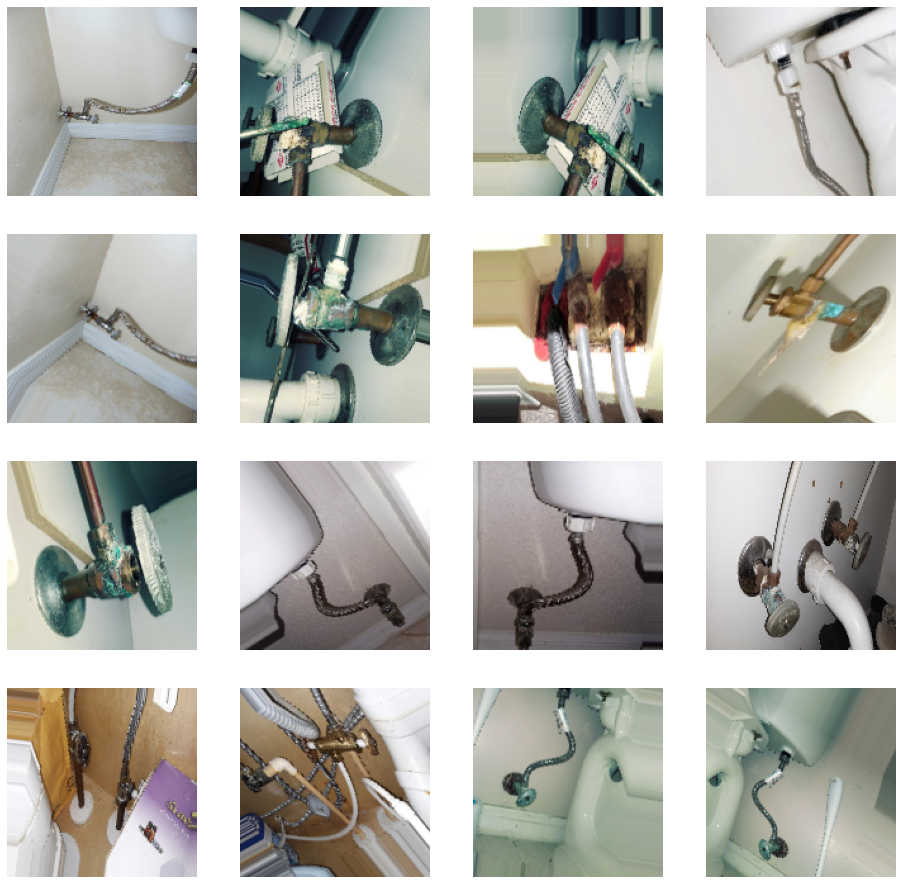

In [12]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_bad_pic = [os.path.join(TRAIN_BAD_DIR, fname) 
                for fname in train_bad_names[pic_index-8:pic_index]]
next_good_pic = [os.path.join(TRAIN_GOOD_DIR, fname) 
                for fname in train_good_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_bad_pic + next_good_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [13]:
BATCH_SIZE = 40
IMG_SHAPE  = 150
TRAIN_DIR = '{}/train'.format(file_path)
TEST_DIR = '{}/test'.format(file_path)
print(TRAIN_DIR)
print(TEST_DIR)

/tmp/pipes/train
/tmp/pipes/test


In [14]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [15]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=TRAIN_DIR,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 800 images belonging to 2 classes.


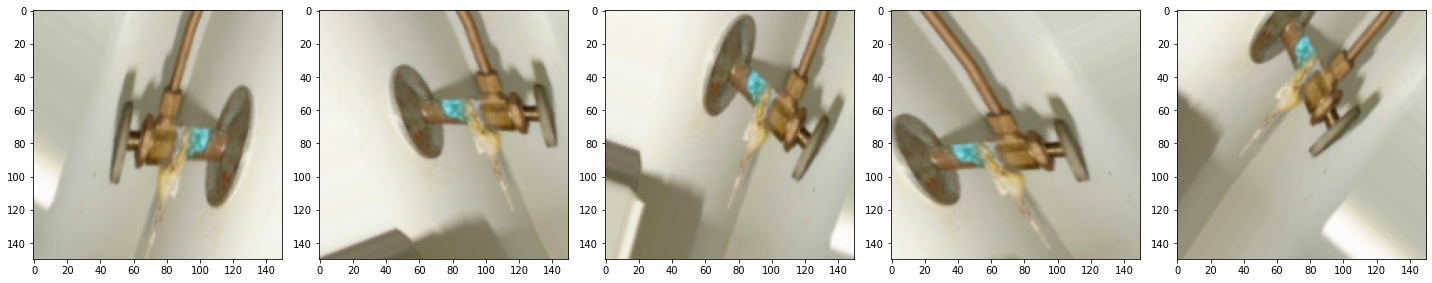

In [16]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [17]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=TEST_DIR,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 200 images belonging to 2 classes.


In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    #tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    #tf.keras.layers.Dense(2)
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [19]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 17, 17, 128)       0

In [21]:
epochs=30
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_test / float(BATCH_SIZE)))
)

Epoch 1/30
20/20 [==============================] - 41s 2s/step - loss: 1.2740 - accuracy: 0.4718 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 2/30
20/20 [==============================] - 39s 2s/step - loss: 0.6935 - accuracy: 0.5371 - val_loss: 0.6774 - val_accuracy: 0.5000
Epoch 3/30
20/20 [==============================] - 39s 2s/step - loss: 0.6715 - accuracy: 0.5361 - val_loss: 0.6423 - val_accuracy: 0.5150
Epoch 4/30
20/20 [==============================] - 39s 2s/step - loss: 0.6497 - accuracy: 0.5342 - val_loss: 0.6713 - val_accuracy: 0.5350
Epoch 5/30
20/20 [==============================] - 39s 2s/step - loss: 0.6695 - accuracy: 0.5361 - val_loss: 0.6263 - val_accuracy: 0.5600
Epoch 6/30
20/20 [==============================] - 39s 2s/step - loss: 0.6266 - accuracy: 0.5912 - val_loss: 0.5850 - val_accuracy: 0.6300
Epoch 7/30
20/20 [==============================] - 39s 2s/step - loss: 0.6091 - accuracy: 0.6460 - val_loss: 0.6107 - val_accuracy: 0.6450
Epoch 8/30
20/20 [==

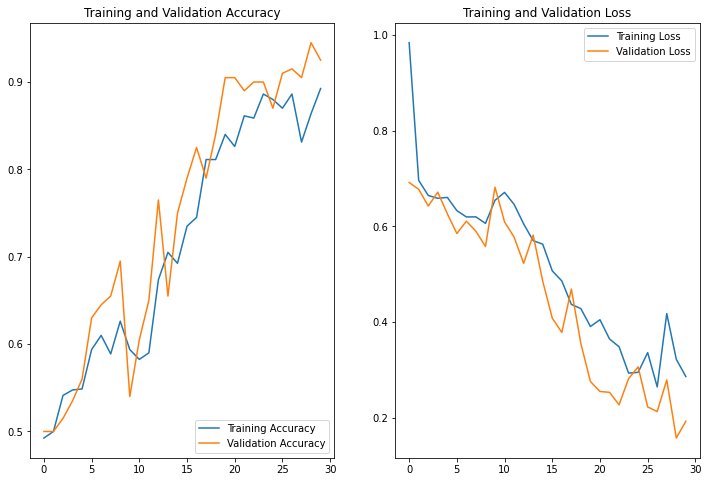

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
!pip install tensorflowjs

     |████████████████████████████████| 71kB 5.7MB/s 
     |████████████████████████████████| 112kB 24.5MB/s 
  Found existing installation: tensorflow-hub 0.12.0
    Uninstalling tensorflow-hub-0.12.0:
      Successfully uninstalled tensorflow-hub-0.12.0


In [24]:
# Save the trained model as a Keras HDF5 file. 

saved_model_path = "./my_model.h5"
model.save(saved_model_path)

In [25]:
# Use the tensorflow.js converter to convert the saved Keras model into JSON format.
!tensorflowjs_converter --input_format=keras {saved_model_path} "./tensorflowjs_model/"

2021-04-25 11:08:44.494531: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [26]:
!zip -r ./tfjs_model.zip ./tensorflowjs_model

  adding: tensorflowjs_model/ (stored 0%)
  adding: tensorflowjs_model/group1-shard8of19.bin (deflated 7%)
  adding: tensorflowjs_model/model.json (deflated 82%)
  adding: tensorflowjs_model/group1-shard10of19.bin (deflated 7%)
  adding: tensorflowjs_model/group1-shard3of19.bin (deflated 7%)
  adding: tensorflowjs_model/group1-shard1of19.bin (deflated 7%)
  adding: tensorflowjs_model/group1-shard12of19.bin (deflated 7%)
  adding: tensorflowjs_model/group1-shard16of19.bin (deflated 7%)
  adding: tensorflowjs_model/group1-shard15of19.bin (deflated 7%)
  adding: tensorflowjs_model/group1-shard19of19.bin (deflated 7%)
  adding: tensorflowjs_model/group1-shard9of19.bin (deflated 7%)
  adding: tensorflowjs_model/group1-shard14of19.bin (deflated 7%)
  adding: tensorflowjs_model/group1-shard7of19.bin (deflated 7%)
  adding: tensorflowjs_model/group1-shard13of19.bin (deflated 7%)
  adding: tensorflowjs_model/group1-shard2of19.bin (deflated 7%)
  adding: tensorflowjs_model/group1-shard5of19.bin 

In [28]:
from google.colab import files
files.download("./tfjs_model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Predict - upload photo

In [ ]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  image_tensor = np.vstack([x])
  classes = model.predict(image_tensor)
  print(classes)
  print(classes[0])
  if classes[0][0]>0.5:
    print("{}: Looks BAD".format(fn))
  else:
    print("{}: Looks GOOD".format(fn))

Saving Good 3.jpg to Good 3.jpg
[[1.]]
[1.]
Good 3.jpg: Looks BAD


Save model

callbacks - early stopping
transfer learning
tensorflow js
tensorflow lite?